In [4]:
import torch
from matplotlib import pyplot as plt

start
10000


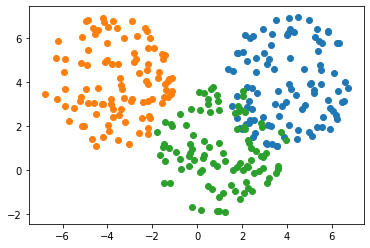

2.2829733 , -0.8266182
3.95257 , 1.3682127
0.15766811 , -1.8453255
-0.21573067 , -1.6889572
2.080843 , 1.9426975
2.258522 , 1.3345871
2.7440186 , -0.055423737
-0.36515522 , 0.16493988
-0.33065224 , 1.1478901
1.6973963 , 2.5812235
0.98207283 , 2.7221737
0.48934937 , -0.7335863
-0.5059004 , 2.0110607
1.8825111 , 2.647066
3.6211967 , 0.02266121
0.46680164 , 2.9913626
-1.1514645 , 2.0655842
2.835413 , 0.6168232
-1.2128963 , -0.5900631
0.95554924 , 1.2184839
3.0454578 , 0.75315857
-0.24840546 , 0.93241024
-0.9501629 , 0.7866297
-0.1557827 , 0.43883514
0.8898468 , 3.3752556
1.8884926 , -1.3403435
1.221611 , 0.4042244
2.1000004 , 1.9445286
2.264742 , 0.11719704
-0.72476864 , 0.014513016
0.905797 , 3.1096487
0.5078201 , 1.0255947
2.0801678 , -1.0407085
1.1421337 , 0.7746248
1.6896591 , -0.9663563
1.5205622 , -0.6972408
-0.31299973 , 0.7836094
2.4486265 , -0.97770023
-1.4428978 , 0.3773365
2.907856 , 1.9491119
3.215889 , -0.38901043
2.8370895 , 2.1406193
0.586113 , 2.6461391
-0.35650826 , 0.609

In [79]:
#4,4일때

m2=24*torch.rand(10000,2)-12
#1,1일때
m4=24*torch.rand(10000,2)-12
#-4,4일때
m6=24*torch.rand(10000,2)-12

TRY1=torch.zeros(100,2)
TRY2=torch.zeros(100,2)
TRY3=torch.zeros(100,2)

count=0
cnt=0
print("start")
print(len(m2))

while True:
    if(count==100):
        break
    if ((m2[cnt,0]-4)**2 + (m2[cnt,1]-4)**2)<=9:
        TRY1[count,0]=m2[cnt,0]
        TRY1[count,1]=m2[cnt,1]
        count=count+1
    cnt+=1
    
a=torch.Tensor.numpy(TRY1[:,0])
b=torch.Tensor.numpy(TRY1[:,1])

count=0
cnt=0
while True:
    if(count==100):
        break
    if ((m4[cnt,0]-(-4))**2 + (m4[cnt,1]-4)**2)<=9:
        TRY2[count,0]=m4[cnt,0]
        TRY2[count,1]=m4[cnt,1]
        count +=1
    cnt+=1

c=torch.Tensor.numpy(TRY2[:,0])
d=torch.Tensor.numpy(TRY2[:,1])

count=0
cnt=0
while True:
    if(count==100):
        break
    if ((m6[cnt,0]-1)**2 + (m6[cnt,1]-1)**2)<=9:
        TRY3[count,0]=m6[cnt,0]
        TRY3[count,1]=m6[cnt,1]
        count+=1
    cnt+=1


e=torch.Tensor.numpy(TRY3[:,0])
f=torch.Tensor.numpy(TRY3[:,1])

plt.scatter(a,b)
plt.scatter(c,d)
plt.scatter(e,f)
plt.show()

a_list=[];b_list=[];c_list=[]

for i in range(100):
    print(e[i],",",f[i])

e = torch.FloatTensor(e)
f = torch.FloatTensor(f)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
torch.manual_seed(777)
if device=='cuda':
    torch.cpu.manual_seed_all(777)


TRY1_Y = torch.ones(100,1)
TRY2_Y = torch.zeros(100,1)
TRY3_Y = torch.ones(100,1)
    
X=torch.cat([TRY1,TRY2],dim=0)
X=torch.cat([X,TRY3])
print(X.shape)
Y = torch.cat([TRY1_Y,TRY2_Y])
Y = torch.cat([Y,TRY3_Y])
print(Y.shape)

linear1 = torch.nn.Linear(2,3,bias=True)
linear2 = torch.nn.Linear(3,4,bias=True)
linear3 = torch.nn.Linear(4,2,bias=True)
linear4 = torch.nn.Linear(2,1,bias=True)
sigmoid = torch.nn.Sigmoid()

model = torch.nn.Sequential(linear1,sigmoid,linear2,sigmoid,linear3,sigmoid,linear4,sigmoid).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for step in range(100001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step%1000 == 0:
        print(step, cost.item())
       # for param in enumerate(model.parameters()):
           # print("가중치 : ",param)

    # Accuracy computation
    # True if hypothesis > 0.5 else False
    
with torch.no_grad():
    predicted = (model(X) > 0.5).float()
    accuracy = (predicted == Y).float().mean()

    print('\nHypothesis: ',hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(),'\nAccuracy: ', accuracy.item())

X = torch.FloatTensor([[0,0],[0,1],[0.5,0.5],[1,1]])
print(model(X))

torch.Size([300, 2])
torch.Size([300, 1])
0 0.6369103789329529
1000 0.634402871131897
2000 0.6335577368736267
3000 0.6324198246002197
4000 0.6308061480522156
5000 0.6283959150314331
6000 0.6246023774147034
7000 0.6183022260665894
8000 0.607241690158844
9000 0.5867304801940918
10000 0.5477313995361328
11000 0.4807929992675781
12000 0.3960454761981964
13000 0.3211533725261688
14000 0.2667410671710968
15000 0.22811278700828552
16000 0.19916994869709015
17000 0.17560522258281708
18000 0.15452352166175842
19000 0.13461142778396606
20000 0.11646672338247299
21000 0.10108451545238495
22000 0.08859096467494965
23000 0.0785481333732605
24000 0.07041019946336746
25000 0.06372060626745224
26000 0.05814126506447792
27000 0.053426776081323624
28000 0.04939659684896469
29000 0.045915637165308
30000 0.042880818247795105
31000 0.04021283984184265
32000 0.03784959018230438
33000 0.03574207052588463
34000 0.03385106474161148
35000 0.03214497119188309
36000 0.030598046258091927
37000 0.02918916381895542


In [38]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(result3)

    # cost/loss function
    cost = criterion(hypothesis, result4)
    cost.backward()
    optimizer.step()

    if step%500 == 0:
        print(step, cost.item())

X = torch.FloatTensor([[0,0],[0,1],[0.5,0.5],[1,1]])
print(model(X))

NameError: name 'result3' is not defined

In [39]:
import torch
import torch.nn
import numpy as np
import math, random
from matplotlib import pyplot as plt
device = 'cpu'

def get_random_point(radius,x1,y1):
    while True:
        # Generate the random point
        x = (random.random() * radius * 2) - radius
        y = (random.random() * radius * 2) - radius
        # Check that it is inside the circle
        if math.sqrt(x ** 2 + y ** 2) < radius:
            # Return it
            return [x+x1, y+y1]

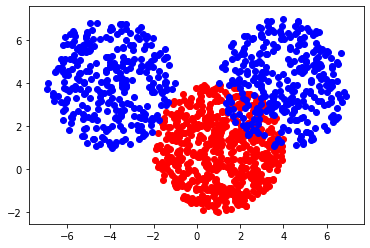

In [4]:
#prepare dataset
x = list()
y = list()
for i in range(300):
    x.append(get_random_point(3,1,1))
    x.append(get_random_point(3,1,1))
    y.append(get_random_point(3,4,4))
    y.append(get_random_point(3,-4,4))

z = list()
for i in range(200):
    z.append([0.])
for i in range(200):
    z.append([1.])

for dot in x:
    plt.scatter(dot[0],dot[1],color='r')
for dot in y:
    plt.scatter(dot[0],dot[1],color='b')

In [5]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
torch.manual_seed(777)
if device=='cuda':
    torch.cpu.manual_seed_all(777)

X = torch.FloatTensor(x+y)
Y = torch.FloatTensor(z)

linear1 = torch.nn.Linear(2,3,bias=True)
linear2 = torch.nn.Linear(3,4,bias=True)
linear3 = torch.nn.Linear(4,2,bias=True)
linear4 = torch.nn.Linear(2,1,bias=True)
sigmoid = torch.nn.Sigmoid()

model = torch.nn.Sequential(linear1,sigmoid,linear2,sigmoid,linear3,sigmoid,linear4,sigmoid).to(device)

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step%1000 == 0:
        print(step, cost.item())
       # for param in enumerate(model.parameters()):
           # print("가중치 : ",param)

    # Accuracy computation
    # True if hypothesis > 0.5 else False
    
with torch.no_grad():
    predicted = (model(X) > 0.5).float()
    accuracy = (predicted == Y).float().mean()

    print('\nHypothesis: ',hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(),'\nAccuracy: ', accuracy.item())

X = torch.FloatTensor([[0,0],[0,1],[0.5,0.5],[1,1]])
print(model(X))


C:\Users\Administrator\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:2016: UserWarning: Using a target size (torch.Size([400, 1])) that is different to the input size (torch.Size([1200, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


ValueError: Target and input must have the same number of elements. target nelement (400) != input nelement (1200)